In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit.library import QFT, RGQFTMultiplier
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from fractions import Fraction
from collections import Counter

In [2]:
a, N = 4, 21

q = 1
while True:
    if 2**q >= N**2:
        break
    q += 1

n = int(np.ceil(np.log2(N)))
Q = 2**q

print(f'q = {q}, n = {n}, Q = {Q}')

q = 9, n = 5, Q = 512


In [3]:
p = math.gcd(a, N)
if p > 1:
    print('Answer: p = ', p, 'q = ', N//p)
else:
    print('continue')

continue


In [4]:
for i in range(N):
    print(f'{a}^{i} mod {N} = ', a**i%N, f' = {("0"*(n - len(bin(a**i%N)[2:])) + bin(a**i%N)[2:])[::-1]}')
    if i > 0 and a**i%N == 1:
        break

4^0 mod 21 =  1  = 10000
4^1 mod 21 =  4  = 00100
4^2 mod 21 =  16  = 00001
4^3 mod 21 =  1  = 10000


In [5]:
def Uf(a, x):
    
    U = QuantumCircuit(n)
    
    for _ in range(x):
        
        if a == 4:
            U.swap(4, 2)
            U.swap(2, 0)
            
        if a == 5:
            U.x(0)
            U.x(2)
            U.x(4)
            U.swap(4, 2)
            U.swap(4, 0)
        
        if a == 8:
            U.swap(0, 3)
    
    U = U.to_gate()
    U.name = f'{a}^{x} mod {N}'
    c_U = U.control()
    
    return c_U

In [6]:
work_reg = [i + q for i in range(n)]

In [7]:
Shor = QuantumCircuit(q + n, q)

for q_i in range(q):
    Shor.h(q_i)

Shor.x(q)

for q_i in range(q):
    Shor.append(Uf(a, 2**q_i), [q_i] + work_reg)
    
Shor.append(QFT(q, do_swaps = True, inverse = True), range(q))

Shor.measure(range(q), range(q))
Shor.draw(fold = -1) 

┌───┐                                                                                                                                              ┌───────┐┌─┐                        
 q_0: ┤ H ├───────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├────────────────────────
      ├───┤       │                                                                                                                                      │       │└╥┘┌─┐                     
 q_1: ┤ H ├───────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├─────────────────────
      ├───┤       │              │                                                                                                                       │       │ ║ └╥┘┌─┐                  
 q_2: ┤ H ├───────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├──────────────────
      ├───┤       │              │              │                                                                                                        │       │ ║  ║ └╥┘┌─┐               
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├───────────────
      ├───┤       │              │              │              │                                                                                         │       │ ║  ║  ║ └╥┘┌─┐            
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■──────────────────────────────────────────────────────────────────────────┤4 IQFT ├─╫──╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │              │                                                                          │       │ ║  ║  ║  ║ └╥┘┌─┐         
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■──────────────────────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │               │                                                          │       │ ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■──────────────────────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │               │                                          │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■─────────────────────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                │                         │       │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_8: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────┼────────────────■────────┤8      ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_9: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               ││               │          ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤1   

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
counts = aer_sim.run(transpile(Shor, aer_sim)).result().get_counts()

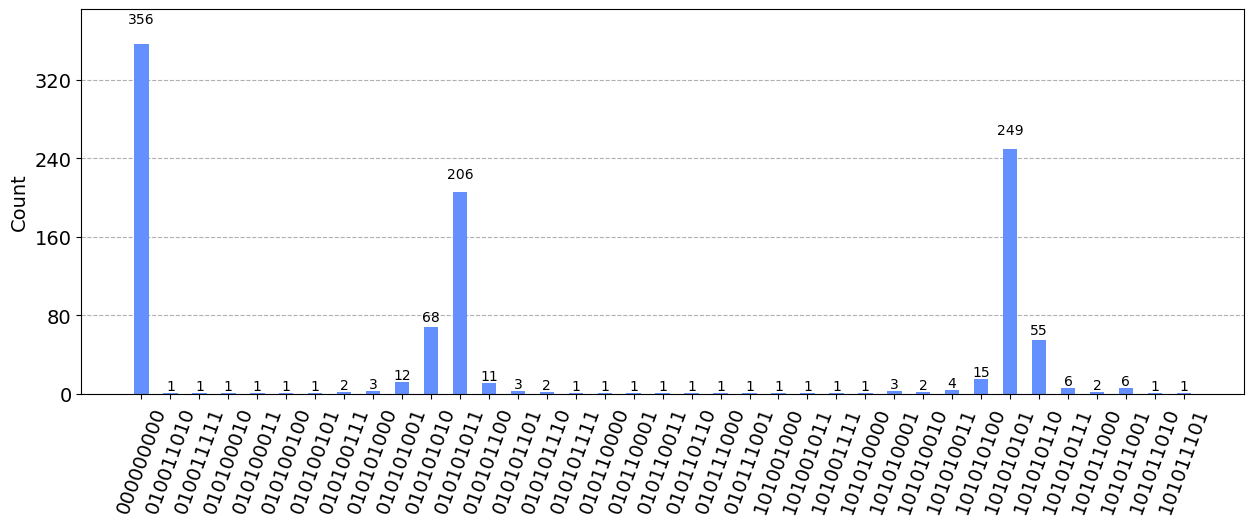

In [9]:
plot_histogram(counts, figsize = (15, 5))

In [10]:
counts.pop('0'*q)

356

In [11]:
outputs = list(dict(sorted(counts.items(), key=lambda item: item[1], reverse = True)).keys())[:15]
l = len(outputs)

In [12]:
for j in range(1, N):
    phases = [int(numm, 2)/Q for numm in outputs]
    fracs = [Fraction(phases[i]).limit_denominator(N//j) for i in range(l)]
    candidates = [frac.denominator for frac in fracs]
    r = Counter(candidates).most_common(1)[0][0]
    if a**r%N == 1:
        break
    if a**(r*2)%N == 1:
        r *= 2
        break
print(Counter(candidates))        
rows = [(outputs[i], f'{int(outputs[i], 2)}/{Q}', phases[i], fracs[i]) for i in range(l)]

df = pd.DataFrame(rows, columns = ['Register output', 'Phase_frac', 'Phase','Phase_frac_simple'])
df

Counter({3: 14, 20: 1})


,Register output,Phase_frac,Phase,Phase_frac_simple
0,101010101,341/512,0.666016,2/3
1,010101011,171/512,0.333984,1/3
2,010101010,170/512,0.332031,1/3
3,101010110,342/512,0.667969,2/3
4,101010100,340/512,0.664062,2/3
5,010101001,169/512,0.330078,1/3
6,010101100,172/512,0.335938,1/3
7,101011001,345/512,0.673828,2/3
8,101010111,343/512,0.669922,2/3
9,101010011,339/512,0.662109,2/3


In [13]:
print(f'ord({a}) = ', r)

ord(4) =  3


In [14]:
p = math.gcd(r, N)
if p > 1:
    print('Answer: p = ', p, 'q = ', N//p)
else:
    if r%2 == 0:
        p = math.gcd(a**(r//2) - 1, N)
        q = math.gcd(a**(r//2) + 1, N)
        print(p, q)
        if p > 1 or q > 1:
            
            print(f'Answer: p, q = gcd({a}^({r}/2) ± 1, {N}) = {max(p, q), N//max(p, q)}')
        else:
            print('try another a')
    else:
        print('try another a')

Answer: p =  3 q =  7


Складність:  $n+q=\left\lceil3\cdot\log_221\right\rceil=14$ кубітів.
До $72\left\lceil\log_221\right\rceil^3=9000$ вентилів, залежно від значення $a$.

### compiled Shor for a = 4

In [16]:
a = 4

In [17]:
for i in range(2**q):
    if i in [0] + [2**j for j in range(N)]:
        print(f'{a}^{i} mod {N} = ', a**i%N, f' = {("0"*(n - len(bin(a**i%N)[2:])) + bin(a**i%N)[2:])[::-1]}')

4^0 mod 21 =  1  = 10000
4^1 mod 21 =  4  = 00100
4^2 mod 21 =  16  = 00001
4^4 mod 21 =  4  = 00100
4^8 mod 21 =  16  = 00001
4^16 mod 21 =  4  = 00100
4^32 mod 21 =  16  = 00001
4^64 mod 21 =  4  = 00100
4^128 mod 21 =  16  = 00001
4^256 mod 21 =  4  = 00100


$$|1>=00$$
$$|4>=10$$
$$|16>=01$$

In [18]:
n, q = 2, 3
Q = 2**q

In [19]:
Shor = QuantumCircuit(q + n, q)

for q_i in range(q):
    Shor.h(q_i)

Shor.cx(2, 4) #U1

Shor.cx(1, 4)  #U2
Shor.cswap(1, 3, 4)
    
Shor.x(4)  #U4
Shor.ccx(0, 4, 3)
Shor.x(4)
Shor.cswap(0, 3, 4)

Shor.append(QFT(q, do_swaps = True, inverse = True), range(q))

Shor.measure(range(q), range(q))
Shor.draw() 

┌───┐                               ┌───────┐┌─┐      
q_0: ┤ H ├────────────────────■────────■─┤0      ├┤M├──────
     ├───┤                    │        │ │       │└╥┘┌─┐   
q_1: ┤ H ├───────■───■────────┼────────┼─┤1 IQFT ├─╫─┤M├───
     ├───┤       │   │        │        │ │       │ ║ └╥┘┌─┐
q_2: ┤ H ├──■────┼───┼────────┼────────┼─┤2      ├─╫──╫─┤M├
     └───┘  │    │   │      ┌─┴─┐      │ └───────┘ ║  ║ └╥┘
q_3: ───────┼────┼───X──────┤ X ├──────X───────────╫──╫──╫─
          ┌─┴─┐┌─┴─┐ │ ┌───┐└─┬─┘┌───┐ │           ║  ║  ║ 
q_4: ─────┤ X ├┤ X ├─X─┤ X ├──■──┤ X ├─X───────────╫──╫──╫─
          └───┘└───┘   └───┘     └───┘             ║  ║  ║ 
c: 3/══════════════════════════════════════════════╩══╩══╩═
                                                   0  1  2

In [20]:
Shor = QuantumCircuit(q + n, q)

for q_i in range(q):
    Shor.h(q_i)

Shor.cx(0, 3) #U1

Shor.cx(1, 3)  #U2
Shor.cswap(1, 3, 4)
    
Shor.x(3)  #U4
Shor.ccx(2, 4, 3)
Shor.x(3)
Shor.cswap(2, 3, 4)

Shor.append(QFT(q, do_swaps = True, inverse = True), range(q))

Shor.measure(range(q), range(q))
Shor.draw() 

┌───┐                               ┌───────┐┌─┐      
q_0: ┤ H ├──■────────────────────────────┤0      ├┤M├──────
     ├───┤  │                            │       │└╥┘┌─┐   
q_1: ┤ H ├──┼────■───■───────────────────┤1 IQFT ├─╫─┤M├───
     ├───┤  │    │   │                   │       │ ║ └╥┘┌─┐
q_2: ┤ H ├──┼────┼───┼────────■────────■─┤2      ├─╫──╫─┤M├
     └───┘┌─┴─┐┌─┴─┐ │ ┌───┐┌─┴─┐┌───┐ │ └───────┘ ║  ║ └╥┘
q_3: ─────┤ X ├┤ X ├─X─┤ X ├┤ X ├┤ X ├─X───────────╫──╫──╫─
          └───┘└───┘ │ └───┘└─┬─┘└───┘ │           ║  ║  ║ 
q_4: ────────────────X────────■────────X───────────╫──╫──╫─
                                                   ║  ║  ║ 
c: 3/══════════════════════════════════════════════╩══╩══╩═
                                                   0  1  2

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
counts = aer_sim.run(transpile(Shor, aer_sim)).result().get_counts()

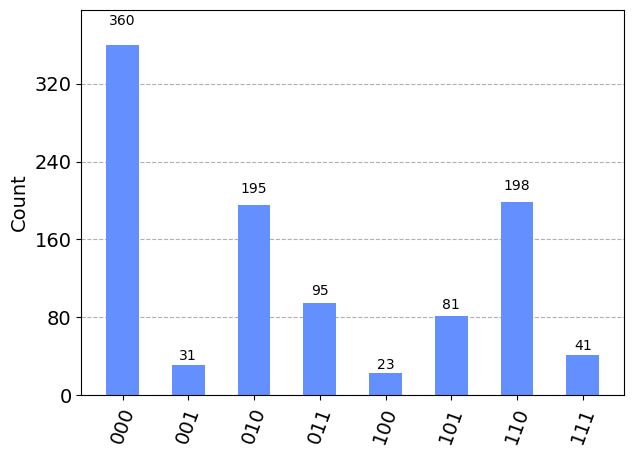

In [22]:
plot_histogram(counts, figsize = (7, 5))

In [23]:
counts.pop('0'*q)

360

In [24]:
outputs = list(dict(sorted(counts.items(), key=lambda item: item[1], reverse = True)).keys())#[:2]
l = len(outputs)

In [25]:
for j in range(1, N):
    phases = [int(numm, 2)/Q for numm in outputs]
    fracs = [Fraction(phases[i]).limit_denominator(N//j) for i in range(l)]
    candidates = [frac.denominator for frac in fracs]
    r = Counter(candidates).most_common(1)[0][0]
    if a**r%N == 1:
        break
    
rows = [(outputs[i], f'{int(outputs[i], 2)}/{Q}', phases[i], fracs[i]) for i in range(l)]

df = pd.DataFrame(rows, columns = ['Register output', 'Phase_frac', 'Phase','Phase_frac_simple'])
df

,Register output,Phase_frac,Phase,Phase_frac_simple
0,110,6/8,0.750,2/3
1,010,2/8,0.250,1/3
2,011,3/8,0.375,1/3
3,101,5/8,0.625,2/3
4,111,7/8,0.875,1
5,001,1/8,0.125,0
6,100,4/8,0.500,1/2


In [26]:
print(f'ord({a}) = ', r)

ord(4) =  3


In [27]:
p = math.gcd(r, N)
if p > 1:
    print('Answer: p = ', p, 'q = ', N//p)
else:
    if r%2 == 0:
        p = math.gcd(a**(r//2) - 1, N)
        q = math.gcd(a**(r//2) + 1, N)
        if p > 1 or q > 1:
            print(f'Answer: p, q = gcd({a}^({r}/2) ± 1, {N}) = {max(p, q), N//max(p, q)}')
        else:
            print('try another a')
    else:
        print('try another a')

Answer: p =  3 q =  7


Складність:  $5$ кубітів, $68$ вентилів проти $14$ кубітів та $\approx 3200$ вентилів в попередній схемі.

### compiled Shor for a = 8, 13 (ord(a) = 2)

In [28]:
Q, a = 2, 13

In [29]:
Shor = QuantumCircuit(2, 1)

Shor.h(0)
Shor.cx(0, 1)
Shor.h(0)
Shor.measure(0, 0)

Shor.draw() 

┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──────╫─
          └───┘      ║ 
c: 1/════════════════╩═
                     0

In [30]:
aer_sim = Aer.get_backend('aer_simulator')
counts = aer_sim.run(transpile(Shor, aer_sim)).result().get_counts()

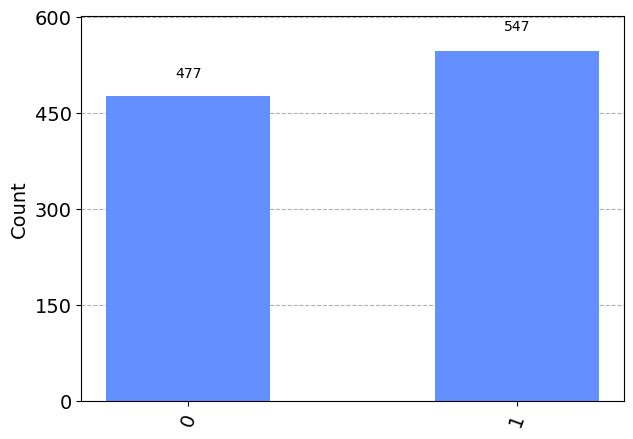

In [31]:
plot_histogram(counts, figsize = (7, 5))

In [32]:
counts.pop('0')

477

In [33]:
outputs = list(dict(sorted(counts.items(), key=lambda item: item[1], reverse = True)).keys())
l = len(outputs)

In [34]:
for j in range(1, N):
    phases = [int(numm, 2)/Q for numm in outputs]
    fracs = [Fraction(phases[i]).limit_denominator(N//j) for i in range(l)]
    candidates = [frac.denominator for frac in fracs]
    r = Counter(candidates).most_common(1)[0][0]
    if a**r%N == 1:
        break
    if a**(r*2)%N == 1:
        r *= 2
        break
print(Counter(candidates))        
rows = [(outputs[i], f'{int(outputs[i], 2)}/{Q}', phases[i], fracs[i]) for i in range(l)]

df = pd.DataFrame(rows, columns = ['Register output', 'Phase_frac', 'Phase','Phase_frac_simple'])
df

Counter({2: 1})


,Register output,Phase_frac,Phase,Phase_frac_simple
0,1,1/2,0.5,1/2


### Допоміжні обчислення

In [35]:
p, q = 3, 7

p_q = pow(p, -1, q)
q_p = pow(q, -1, p)

(p*p_q + q*q_p)%N, (p*p_q - q*q_p)%N, (- p*p_q + q*q_p)%N, (- p*p_q - q*q_p)%N

(1, 8, 13, 20)

In [37]:
U = QuantumCircuit(int(np.ceil(np.log2(N))))   #a = 4

U.swap(2, 4)
U.swap(0, 2)

U.draw()

q_0: ────X─
         │ 
q_1: ────┼─
         │ 
q_2: ─X──X─
      │    
q_3: ─┼────
      │    
q_4: ─X────

In [38]:
U = QuantumCircuit(int(np.ceil(np.log2(N))))   #a = 5

U.x(0)
U.x(2)
U.x(4)
U.swap(4, 2)
U.swap(4, 0)

U.draw()

┌───┐      
q_0: ┤ X ├────X─
     └───┘    │ 
q_1: ─────────┼─
     ┌───┐    │ 
q_2: ┤ X ├─X──┼─
     └───┘ │  │ 
q_3: ──────┼──┼─
     ┌───┐ │  │ 
q_4: ┤ X ├─X──X─
     └───┘

In [39]:
U = QuantumCircuit(int(np.ceil(np.log2(N))))   #a = 8

U.swap(0, 3)

U.draw()

q_0: ─X─
      │ 
q_1: ─┼─
      │ 
q_2: ─┼─
      │ 
q_3: ─X─
        
q_4: ───

In [40]:
N = 451 #a = 37

U = QuantumCircuit(int(np.ceil(np.log2(N))))

U.x(2)
U.x(3)
U.x(5)
U.x(7)
U.cx(0, 3)
U.cx(0, 7)
U.cswap(3, 4, 0)
U.cx(3, 5)
U.ccx(2, 7, 0)
U.ccx(2, 7, 3)
U.x(2)
U.ccx(2, 3, 0)
U.x(5)
U.ccx(0, 5, 2)
U.ccx(0, 5, 3)
U.x(5)

U.draw()

┌───┐          ┌───┐               
q_0: ───────■────■───X──────┤ X ├──────────┤ X ├──■────■───────
            │    │   │      └─┬─┘          └─┬─┘  │    │       
q_1: ───────┼────┼───┼────────┼──────────────┼────┼────┼───────
     ┌───┐  │    │   │        │       ┌───┐  │  ┌─┴─┐  │       
q_2: ┤ X ├──┼────┼───┼────────■────■──┤ X ├──■──┤ X ├──┼───────
     ├───┤┌─┴─┐  │   │        │  ┌─┴─┐└───┘  │  └─┬─┘┌─┴─┐     
q_3: ┤ X ├┤ X ├──┼───■───■────┼──┤ X ├───────■────┼──┤ X ├─────
     └───┘└───┘  │   │   │    │  └─┬─┘            │  └─┬─┘     
q_4: ────────────┼───X───┼────┼────┼──────────────┼────┼───────
     ┌───┐       │     ┌─┴─┐  │    │  ┌───┐       │    │  ┌───┐
q_5: ┤ X ├───────┼─────┤ X ├──┼────┼──┤ X ├───────■────■──┤ X ├
     └───┘       │     └───┘  │    │  └───┘               └───┘
q_6: ────────────┼────────────┼────┼───────────────────────────
     ┌───┐     ┌─┴─┐          │    │                           
q_7: ┤ X ├─────┤ X ├──────────■────■───────────────────────────
     └───┘     └───┘                                           
q_8: ──────────────────────────────────────────────────────────